# Block 6 Exercise 2: finding the best parameters for predicting the fare of taxi rides
We return to our Random Forest Regression and want to automatically optimize all free parameters ...

In [0]:
import pandas as pd
import numpy as np
import folium


In [2]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/keuperj/DataScienceSS20.git
  path='DataScienceSS20'

running in Colab: True
Cloning into 'DataScienceSS20'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 550 (delta 14), reused 15 (delta 3), pack-reused 523
Receiving objects: 100% (550/550), 122.00 MiB | 24.73 MiB/s, done.
Resolving deltas: 100% (218/218), done.
Checking out files: 100% (210/210), done.


In [0]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv(path+'/DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

### Scikit Optimize
Scikit Optimize (https://scikit-optimize.github.io/stable/index.html) is a AutoML toolbox wrapped around Scikit-Learn. It allows us to use state-of-the-art automatic hyper-parameter optimization on top of our learning algorithms.   



In [4]:
# install 
!pip install scikit-optimize

     |████████████████████████████████| 81kB 2.5MB/s 


### E 2.1 Bayesian Optimization of a Random Forest Regression Model
use Bayesian Optimization with Cross-Validation (https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html#skopt.BayesSearchCV) to find the best regression model. Compare
* linear regression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) 
* Random Forest regression (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* and SVM regression (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)

NOTES: this can become quite compute intensive! Hence,
* use a smaller subset of the training data to run the experiments 
* think about the range of your parameters (e.g. larger number of trees in RF or high C-values in SMV will make models expensive)
* optimize only the following parameters per model type:
    * linear: no parameters to optimize
    * RF: #trees and depth
    * SVM: C and gamma (use RBF kernel)
* parallelize -> n_jobs
* use CoLab to rum the job for up to 12h 


In [0]:
X_train = X[X['pickup_year'] != 2015]
X_test = X[X['pickup_year'] == 2015]
y_train = y.iloc[list(X_train.index)]
y_test = y.iloc[list(X_test.index)]

X_train_small = X_train[:37000]
X_test_small = X_test[:3000]
y_train_small = y_train[:37000]
y_test_small = y_test[:3000]

In [6]:
print(X_train_small.shape,y_train_small.shape,X_test_small.shape,y_test_small.shape)

(37000, 31) (37000,) (3000, 31) (3000,)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from skopt import BayesSearchCV

from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import train_test_split

lr = LinearRegression()
regr = RandomForestRegressor()
svr = SVR(kernel='rbf')

In [12]:
opt_lr = BayesSearchCV (lr, {'fit_intercept':[True,False],'normalize':[True,False]}, n_iter=32, random_state=0, n_jobs=4)

_ = opt_lr.fit(X_train_small, y_train_small)

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/learning/gaussian_process/gpr.py:294: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X)
/usr/local/lib/python3.6/dist-packages/skopt/learning/gaussian_process/gpr.py:294: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X)
/usr/local/lib/python3.6/dist-pac

0.8014778229390427


defaultdict(<class 'list'>, {'split0_test_score': [0.6538230320632588, 0.6538230320632508, 0.6538230320632588, 0.6538230320632508, 0.6538584923697243, 0.6538230320632588, 0.6538230320632588, 0.6538230320632588, 0.6538230320632508, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243, 0.6538584923697243], 'split1_test_score': [0.7191324326829129, 0.7191324326829148, 0.7191324326829129, 0.7191324326829148, 0.7190538983254806, 0.7191324326829129, 0.7191324326829129, 0.7191324326829129, 0.7191324326829148, 0.7190538983254806, 0.7190538983254806, 0.7190538983254806, 0.7190538983254806, 0.7190538983254806, 0.7190

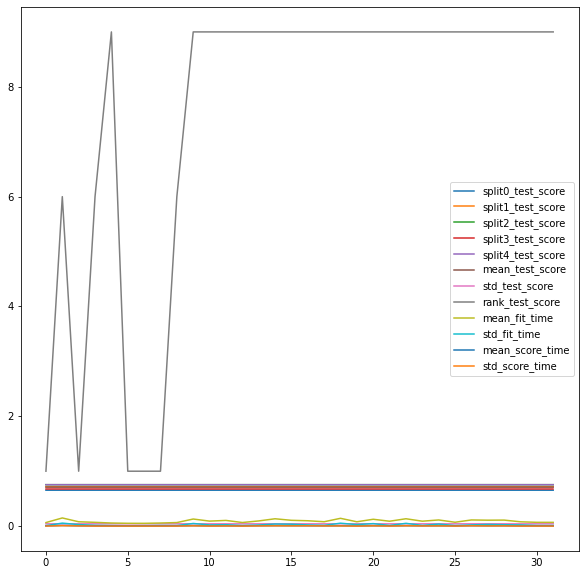

In [20]:
import matplotlib.pyplot as plt 
pd.DataFrame(opt_lr.cv_results_).plot(figsize=(10,10))
print(opt_lr.cv_results_)
print(opt_lr.best_params_)
print(opt_lr.score(X_test_small, y_test_small))

In [18]:
opt_regr = BayesSearchCV (regr, {
     'n_estimators': Integer(1,200),
     'max_depth': Integer(1,15)},
      n_iter=32,
      random_state=0,n_jobs=4)

_ = opt_regr.fit(X_train_small, y_train_small)
print(opt_regr.score(X_test_small, y_test_small))

0.8533919758066667


defaultdict(<class 'list'>, {'split0_test_score': [0.8104037495068337, 0.7862039375517107, 0.8086462807898783, 0.7348568682636364, 0.7676390392499545, 0.8138028662212373, 0.8111410605599665, 0.8104043338602542, 0.6999549189070415, 0.7982346812625397, 0.7183196638088964, 0.811918492578961, 0.8058687431470807, 0.6752927718323488, 0.8126088410778401, 0.813307025060976, 0.8115065883852213, 0.7434027337142238, 0.5239526326301365, 0.8112818529159889, 0.8122702598886287, 0.8107179703390248, 0.8110147032647854, 0.8090994900051829, 0.8101624850069782, 0.818371315255927, 0.8131128263312213, 0.8128662571502578, 0.81251859821665, 0.809875302132856, 0.8135147904328824, 0.8138087996236312], 'split1_test_score': [0.8160906107124234, 0.799259186076945, 0.8109903837613741, 0.7498542664546632, 0.781417657219139, 0.8200930675231637, 0.8174767747268861, 0.8150674750764603, 0.7113082034695546, 0.8106834948947538, 0.7221354471105519, 0.8198877784243899, 0.8133565351597248, 0.6590094905236275, 0.819404857640

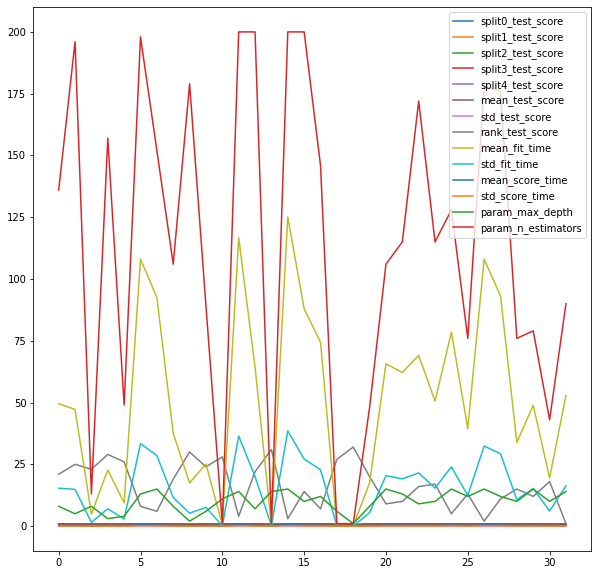

In [19]:
pd.DataFrame(opt_regr.cv_results_).plot(figsize=(10,10))
print(opt_regr.cv_results_)
print(opt_regr.best_params_)
print(opt_regr.score(X_test_small, y_test_small))

In [21]:
opt_svr = BayesSearchCV (svr, {
     'C': Real(1e-2, 1e+1, prior='log-uniform'),
     'gamma': Real(1e-3, 1e+1, prior='log-uniform')},
      n_iter=32,
      random_state=0,n_jobs=4)

_ = opt_svr.fit(X_train_small, y_train_small)
print(opt_svr.score(X_test_small, y_test_small))

0.8627933464943296


defaultdict(<class 'list'>, {'split0_test_score': [-0.06481825894233473, -0.08873083303338647, 0.7433158817285088, -0.08723993169830546, 0.5742873960186214, -0.06661600173792226, 0.00964640764709912, 0.14747442232993768, -0.08700637892966978, 0.25305766872601676, 0.7598093744778426, 0.11845661889748015, 0.7659737776171538, 0.7574776507228838, 0.7634510454535103, 0.7501966343921799, 0.7513900123961541, 0.7627373331504981, 0.7662431438566364, 0.7601904985475241, 0.7637526927665707, 0.7667846737299792, 0.7621359416342871, 0.7650019991180932, 0.7633017837441646, 0.7644914276532975, 0.7573119480514372, 0.7614081977870825, 0.7439779690177382, 0.7581066748705937, 0.7521764495300411, 0.751816286686143], 'split1_test_score': [-0.06174371204976015, -0.08671640812702663, 0.7642800154964915, -0.08535523904052256, 0.5930027525328543, -0.06468964498289975, 0.01328089095344931, 0.1582625692500106, -0.08515932315330543, 0.26964969625197344, 0.7863765016341301, 0.12374843757216526, 0.788525302886097, 0

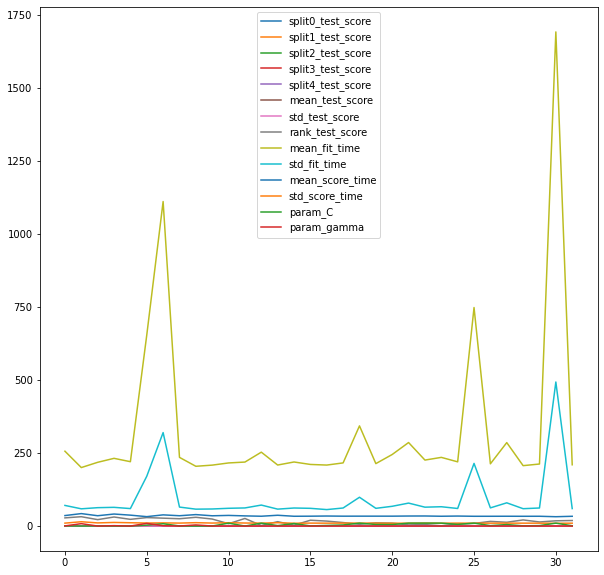

In [22]:
pd.DataFrame(opt_svr.cv_results_).plot(figsize=(10,10))
print(opt_svr.cv_results_)
print(opt_svr.best_params_)
print(opt_svr.score(X_test_small, y_test_small))